# pytorchの基本演算

pytorchはTensorという型で演算を行う。pytorchを利用するには全ての変数はTensorに変換する必要がある<br>
テンソルはnumpyのような書き方が可能

In [1]:
from __future__ import print_function
import torch

In [2]:
#torchのTensor定義
#初期化されていないので完全に0にはならない
x = torch.Tensor(5, 3)
print(x)


 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  5.6052e-45  0.0000e+00
 2.5223e-44  0.0000e+00  0.0000e+00
 2.9427e-44  0.0000e+00  0.0000e+00
 2.6415e-29 -1.5846e+29  3.9690e-29
[torch.FloatTensor of size 5x3]



In [3]:
#乱数で初期化したTensor
x = torch.rand(5, 3)
print(x)


 0.0276  0.9555  0.3755
 0.0343  0.2881  0.0430
 0.5422  0.1671  0.7017
 0.3169  0.7044  0.3255
 0.2512  0.7634  0.2316
[torch.FloatTensor of size 5x3]



In [4]:
#Tensorのサイズの出力
print(x.size())

torch.Size([5, 3])


In [5]:
#足し算可能
y = torch.rand(5, 3)
print(x + y)


 0.2646  1.0537  1.3565
 0.6482  0.6579  0.2776
 1.3476  0.7363  0.7927
 0.7810  1.4644  0.5566
 1.0113  0.9607  0.9306
[torch.FloatTensor of size 5x3]



In [6]:
#足し算のやり方その2
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)


 0.2646  1.0537  1.3565
 0.6482  0.6579  0.2776
 1.3476  0.7363  0.7927
 0.7810  1.4644  0.5566
 1.0113  0.9607  0.9306
[torch.FloatTensor of size 5x3]



In [7]:
#足し算のやり方その3：破壊的な足し算のメソッド
y.add_(x)
print(y)


 0.2646  1.0537  1.3565
 0.6482  0.6579  0.2776
 1.3476  0.7363  0.7927
 0.7810  1.4644  0.5566
 1.0113  0.9607  0.9306
[torch.FloatTensor of size 5x3]



In [8]:
#numpyのように特定行・列だけスライスして取り出すことも可能
print(x[:, 1])


 0.9555
 0.2881
 0.1671
 0.7044
 0.7634
[torch.FloatTensor of size 5]



In [9]:
#numpy.onesのようなtorchの関数
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [10]:
#Tensor -> numpy変換
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [11]:
#add_の場合、参照先にも影響を与える
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [12]:
#普通の演算は問題ない
a=a+1
print(a)
print(b)


 3
 3
 3
 3
 3
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [13]:
#numpy -> Tensor

import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



# pytorchの自動微分機能

pytorchはautogradというTensorを自動微分機能を備えている<br>
この機能はdefined-by-run形式で、要するにどのようにコードが走ったかで微分方向が変わる<br>
そのため、ループごとに構造を変えるなどの柔軟な記述もできる

In [14]:
import torch
from torch.autograd import Variable #自動微分機能のimport

Variable変数はTensorのラッパー<br>
最後に.backward()を呼ぶと、それまでの経路を遡って自動微分してくれる

In [15]:
#requires_gradで微分を行うかどうかを明示する。デフォルトTrue
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [16]:
#VariableはTensorのラッパーなので通常の演算も可能
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [17]:
#呼び出される関数を確認できる
#後のDNNでのNetwork作成時に再度説明する
print(y.creator)

In [18]:
#掛け算もできるし平均もできる
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [19]:
#自動微分する
out.backward()

In [20]:
#d(out)/dxを出力する
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



さて、ここで行われた計算についてもう少し詳しく説明する<br>
そもそもout(=oと略記)がどのように計算されたかというと<br>
$o = \frac{1}{4}\sum_iz_i$ <br>
$z_i = y_i \cdot y_i \cdot 3 = 3 \cdot (x_i + 2)^2$

よって、<br>
$\frac{\partial o}{\partial x_i} = \frac{1}{4} \cdot 3 \cdot 2 \cdot (x_i + 2) = 4.5$<br>
これが各成分となる

pytorchのこの自動微分機能は様々なことができる

In [58]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
 -766.0985
 1223.3398
   31.8218
[torch.FloatTensor of size 3]



In [59]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



# pytorchによるDNN入門

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
%matplotlib inline

In [12]:
# load MNIST data
mnist = fetch_mldata('MNIST original')

X_train, X_test, y_train,  y_test = train_test_split(
    mnist.data.astype('float32'), mnist.target.astype('uint8'), test_size=0.25, random_state=42)

X_train /= 255.0
X_test /= 255.0

In [13]:
#データセットのDataLoader化
train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
train_loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)
test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
test_loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784,500)
        self.fc2 = nn.Linear(500, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x))
        return x

model = Net()

In [15]:
#最適化手法
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [16]:
def train(epoch, model):
    model.train()
    loss_history = []
    for _ in range(epoch):
        running_loss = 0.0
        for i, data in enumerate(train_loader):
           
            inputs, labels = data
            inputs, labels = Variable(inputs), Variable(labels)
            optimizer.zero_grad()
            output = model(inputs)

            #negative log-likelihood loss
            loss = F.nll_loss(output, labels)
            running_loss += loss.data[0]

            #backpropagation
            loss.backward()
            optimizer.step()
            
        print('[epoch %d]  loss: %.3f' % (_ + 1, running_loss / len(train_loader)))
        loss_history.append(running_loss / len(train_loader))

    return loss_history

networkの定義は構造部分init部分とforward部分のみで良い<br>
backword部分はautogradが実行する

In [17]:
print(model)

Net (
  (fc1): Linear (784 -> 500)
  (fc2): Linear (500 -> 84)
  (fc3): Linear (84 -> 10)
)


In [18]:
history = train(20, model)

[epoch 1]  loss: 2.096
[epoch 2]  loss: 1.042
[epoch 3]  loss: 0.542
[epoch 4]  loss: 0.429
[epoch 5]  loss: 0.379
[epoch 6]  loss: 0.350
[epoch 7]  loss: 0.329
[epoch 8]  loss: 0.312
[epoch 9]  loss: 0.298
[epoch 10]  loss: 0.285
[epoch 11]  loss: 0.275
[epoch 12]  loss: 0.264
[epoch 13]  loss: 0.254
[epoch 14]  loss: 0.244
[epoch 15]  loss: 0.236
[epoch 16]  loss: 0.227
[epoch 17]  loss: 0.219
[epoch 18]  loss: 0.212
[epoch 19]  loss: 0.205
[epoch 20]  loss: 0.198


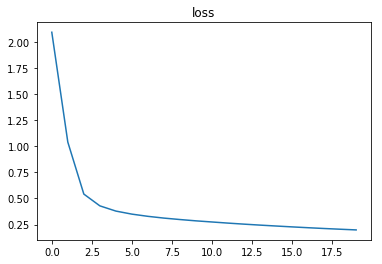

In [19]:
plt.plot(history)
plt.title("loss")
plt.show()

In [20]:
#Accuracy
correct = 0
total = 0
for data in test_loader:
    images, labels = data
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 94 %


## Denoising Auto Encoder

In [24]:
class DAE(nn.Module):
    def __init__(self):
        super(DAE, self).__init__()
        self.fc1 = nn.Linear(784,500)
        self.fc2 = nn.Linear(500, 84)
        self.fc3 = nn.Linear(84, 500)
        self.fc4 = nn.Linear(500, 784)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.sigmoid(self.fc4(x))
        return x

In [25]:
#ネットワーク定義
model_dae = DAE()
#最適化手法
optimizer = optim.Adam(model_dae.parameters(), lr=1e-3)
#loss関数の定義
criterion = nn.BCELoss()

In [26]:
def train(epoch, model):
    model.train()
    loss_history = []
    for loop in range(epoch):
        running_loss = 0.0
        for i, data in enumerate(train_loader):
           
            inputs, _ = data
            inputs = Variable(inputs)
            inputs_noise = inputs + Variable(0.5 * torch.randn(inputs.size()))
            optimizer.zero_grad()
            output = model(inputs_noise)

            loss = criterion(output, inputs)
            running_loss += loss.data[0]

            #backpropagation
            loss.backward()
            optimizer.step()
            
        print('[epoch %d]  loss: %.3f' % (loop + 1, running_loss / len(train_loader)))
        loss_history.append(running_loss / len(train_loader))

    return loss_history

In [27]:
history = train(10,model_dae)

[epoch 1]  loss: 0.179
[epoch 2]  loss: 0.123
[epoch 3]  loss: 0.115
[epoch 4]  loss: 0.111
[epoch 5]  loss: 0.108
[epoch 6]  loss: 0.107
[epoch 7]  loss: 0.105
[epoch 8]  loss: 0.104
[epoch 9]  loss: 0.104
[epoch 10]  loss: 0.103


In [28]:
#1バッチ分の画像とラベルの読み込み
dataiter = iter(train_loader)
images, labels = dataiter.next()
images_noise = images + 0.5 * torch.randn(images.size())
outputs = model_dae(Variable(images_noise))

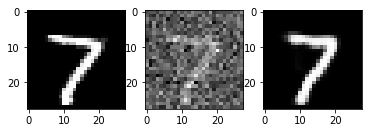

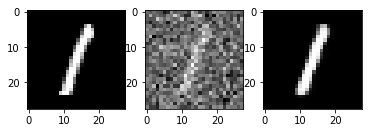

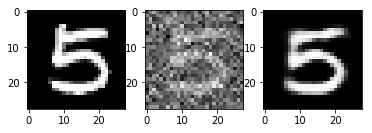

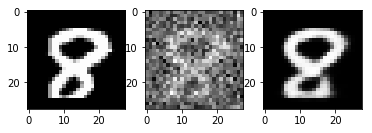

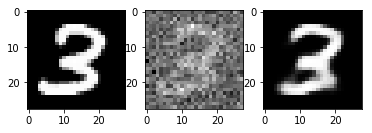

In [29]:
for i in range(5):
    plt.subplot(131)
    plt.imshow(images.numpy()[i].reshape(28,28),cmap='gray')
    plt.subplot(132)
    plt.imshow(images_noise.numpy()[i].reshape(28,28),cmap='gray')
    plt.subplot(133)
    plt.imshow(outputs.data.numpy()[i].reshape(28,28),cmap='gray')
    plt.show()